In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("People Charm_data.csv")

In [6]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [8]:
df["timeSpent.company"]
#throws an error when taken as an attribute

0        3
1        6
2        4
3        3
4        3
        ..
14994    4
14995    2
14996    4
14997    5
14998    3
Name: timeSpent.company, Length: 14999, dtype: int64

In [9]:
#renaming the timespent column

df.rename(columns={"timeSpent.company":"timeSpent_company"},inplace=True)

In [10]:
df.shape

(14999, 10)

In [11]:
#checking for duplicate values

df.duplicated().sum()

3008

In [12]:
#keep only the first occurrences

df=df.drop_duplicates(keep="first")

In [13]:
#to check the null value

df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

Normality Test

Check whether the data is normally distributed or not in satisfactorylevel column using Shapiro-Wilk test

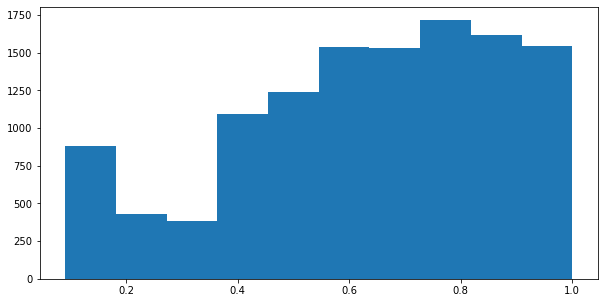

In [15]:
#plotting histogram to visualize the distribution of data

plt.figure(figsize=(10,5))
plt.hist(df["satisfactoryLevel"])
plt.show()

#data is left skewed

C:\Users\vaaru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

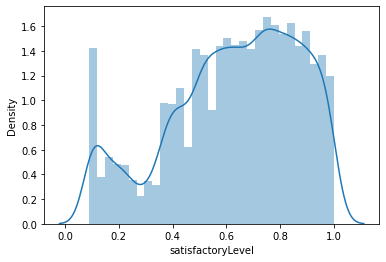

In [16]:
sns.distplot(df["satisfactoryLevel"])

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

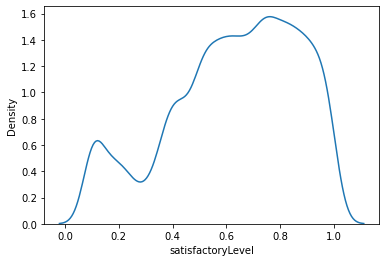

In [17]:
sns.kdeplot(x='satisfactoryLevel',data=df)

In [ ]:
#null hypothesis-h0-data is normally distributed
#Alternate hypo-h1-data is not normally distributed

#Shapiro-Wilk: w-value is small- not normally distributed 
#w-value is large-normally distributed
#ai in w calculation uses covariance, variance and means
#there is a bias w.r.t. sample size

In [18]:
from scipy.stats import shapiro

stat,p_value=shapiro(df["satisfactoryLevel"])

C:\Users\vaaru\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
print(p_value)

0.0


In [ ]:
#p value<0.05--->reject null hypothesis
#not normally distributed

In [20]:
print(stat)

0.9526869654655457


In [23]:
#salary is categorical column

df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [22]:
#copy of df

df1=df

In [24]:
#converting the categ data into num, using label encoder

from sklearn.preprocessing import LabelEncoder

l1=LabelEncoder()

df1["salary"]=l1.fit_transform(df1["salary"])

#fit_transform()--->data will be input and transformed (changes applied)

In [25]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [26]:
#correlation

df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


In [ ]:
#correlation doesn't help with the inferences

<AxesSubplot:>

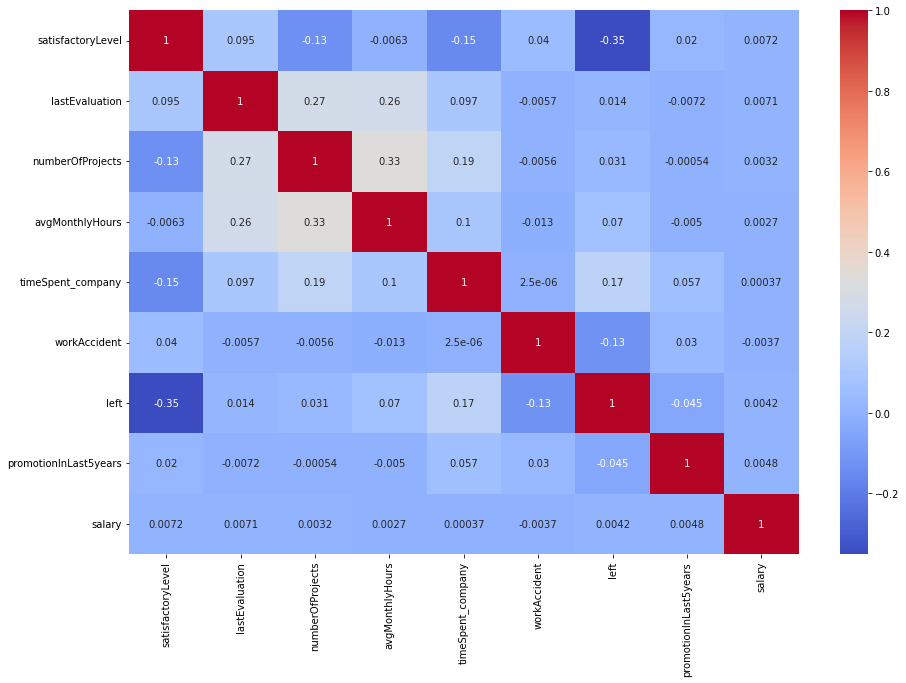

In [27]:
#correlation graph

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

In [28]:
#Descriptive statistics

df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [29]:
#Random experiment-3 columns
#low satisfaction
#low experience
#monthly hours-median (130-200)

emp=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [30]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,support,1
379,0.48,0.78,2,198,2,0,1,0,technical,2
413,0.34,0.67,4,141,2,0,1,0,sales,1
1239,0.14,0.47,4,175,2,0,1,0,RandD,2
1426,0.19,0.58,5,182,2,0,0,0,technical,2


In [31]:
emp["left"].value_counts()

#6 are leaving

0    211
1      6
Name: left, dtype: int64

In [32]:
emp.shape

(217, 10)

In [33]:
emp["avgMonthlyHours"].mean()

167.2258064516129

In [ ]:
#t-test--> used if sample size is less

#used to determine if there is a significant diff b/w means of 2 groups

In [ ]:
#one sample t-test

#whether the means of the sample and the population are different or not

The avgMonthlyHours of an employee having 2 yrs exp is 167. 
Is it same for employees having more than 2 yrs exp?

Condition-Satisfactory level of an employee is from 0-0.5 and Avgmonthhrs is from 130-200

In [34]:
#exp greater than or equal to 3

employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [35]:
employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
7,0.42,0.53,2,142,3,0,1,0,sales,1
8,0.45,0.54,2,135,3,0,1,0,sales,1


In [36]:
employee.shape

(1462, 10)

In [ ]:
#h0:the mean of avg monthly hours is same for both the grps
#h1: not the same

In [37]:
#selecting a random sample from employee

sample_size=100
sample1=employee.sample(sample_size,random_state=0)

In [39]:
#population mean

pop_mean=167

In [38]:
#sample mean

print(sample1["avgMonthlyHours"].mean())

154.2


In [40]:
from scipy.stats import ttest_1samp

stat,pvalue=ttest_1samp(sample1["avgMonthlyHours"],pop_mean)
print(stat,pvalue)

#p value<0.05 (in exponential form)

-6.812850056008294 7.534573793907689e-10


In [45]:
#Degrees of freedom-how many values have freedom to change

n=len(employee["avgMonthlyHours"])
dof=n-1
print(n,dof)  #1 less than actual no. of records

1462 1461


In [43]:
#dof=99 for 100 samples

alpha=0.05

In [44]:
#t-test

from scipy.stats import t

cv=t.ppf([alpha/2,1-alpha/2],df)  #probability point function
print(cv) #critical value-range in which your hypo may go wrong

[-1.96158904  1.96158904]


In [ ]:
#reject null hypothesis as p<0.05--->the mean of avgmonthhrs is not 167 for emp with exp >=3

In [ ]:
#one sample z test for proportion


#the percentage of employee leaving is 3% (6 out of 217) having exp of 2 yrs.
#Is it same for emp with >2 exp?

In [ ]:
#h0: percentages are same
#h1: not the same

In [46]:
from statsmodels.stats.proportion import proportions_ztest

In [47]:
sample_size=100

sample1=employee.sample(sample_size,random_state=0)

In [48]:
count=sample1["left"].value_counts()
count

1    63
0    37
Name: left, dtype: int64

In [49]:
#no. of observations

nobs=len(sample1["left"])
nobs

100

In [52]:
p0=0.3 #pop. percentage(exp=2)

In [50]:
sample1["left"].value_counts()/nobs

1    0.63
0    0.37
Name: left, dtype: float64

In [53]:
stat_oneprop,pvalue_oneprop=proportions_ztest(count=count,nobs=nobs,value=p0,alternative="two-sided",prop_var=False)

In [54]:
print(stat_oneprop,pvalue_oneprop)

-0.5656854249492378 0.5716076449533316


In [ ]:
#pvalue>0.05---> accept h0
#percentages are same for 2 exp and more than 2 exp

In [55]:
from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)  #critical value

[-1.95996398  1.95996398]


Two sample t-test--compare the means of 2 independent groups

In [56]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [57]:
df1["timeSpent_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

Is the mean avgmonth hrs of an employee having exp-2-5 yrs is the sames as that of emp with exp 6-10 yrs? 

In [58]:
#checking the variance of both

e1=df1[(df1.timeSpent_company>=2)&(df1.timeSpent_company<=5)]
e2=df1[(df1.timeSpent_company>=6)&(df1.timeSpent_company<=10)]

In [59]:
e1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
5,0.10,0.77,6,247,4,0,1,0,sales,1


In [60]:
e1.shape

(11167, 10)

In [61]:
e2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,2
13,0.78,0.99,4,255,6,0,1,0,sales,1
26,0.84,0.87,4,246,6,0,1,0,hr,1
33,0.57,0.70,3,273,6,0,1,0,support,1
63,0.90,1.00,5,221,6,0,1,0,sales,2


In [62]:
e2.shape

(824, 10)

In [63]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [64]:
import scipy.stats

scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

In [ ]:
#p value>0.05-->h0 accepted
#mean avgmonth hrs same for exp 2-5 and exp 6-10

In [ ]:
#F-statistics-for the previous problem statement

#to test if variances of two population are same or not

In [65]:
#Sample Variance

print(s1.avgMonthlyHours.var())
print(s2.avgMonthlyHours.var())

2324.24620603015
2680.904522613066


In [66]:
#sample mean

print(s1.avgMonthlyHours.mean())
print(s2.avgMonthlyHours.mean())

#similar mean

203.005
203.3


In [72]:
dof1=len(s1)-1
dof2=len(s2)-1

In [70]:
#f statistics

from scipy.stats import f
F=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(F)
#like p value

0.8669634395501401


In [73]:
scipy.stats.f.cdf(F,dof1,dof2)

0.15739115729495057

In [74]:
f.ppf([alpha/2,1-alpha/2],dof1,dof2)

array([0.75678659, 1.32137648])

In [ ]:
#p value >0.05--->accept h0--->equal variances